In [4]:


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import astropy.units as u
from astropy.utils.data import download_file
from astropy.io import fits  # We use fits to open the actual data file

from astropy.utils import data
data.conf.remote_timeout = 60

from spectral_cube import SpectralCube

from astropy.wcs import WCS
from reproject.adaptive.high_level import reproject_adaptive

from astropy.wcs import WCS
# from reproject import reproject_interp


ModuleNotFoundError: No module named 'spectral_cube'

In [1]:
PATH_COHRS = "../../../BIGSF_DATA/Clustering_COHRS/COHRS_10p50_0p00_CUBE_3T2_R2.fit"
PATH_COHRS_INTEG = "../../../BIGSF_DATA/Clustering_COHRS/COHRS_10p50_0p00_INTEG_R2.fit"
PATH_COHRS_LV = "../../../BIGSF_DATA/Clustering_COHRS/COHRS_10p50_0p00_LV_R2.fit"

PATH_SPINE = "../../../BIGSF_DATA/Clustering_COHRS/COHRS_reprojected_10p50_0p00_CUBE_3T2_R2.fit"

In [3]:
data_cohrs = fits.open(PATH_COHRS)
data_cohrs_integ = fits.open(PATH_COHRS_INTEG)
data_cohrs_lv = fits.open(PATH_COHRS_LV)

data_s2 = fits.open(PATH_SPINE)

NameError: name 'fits' is not defined

In [5]:
plt.figure(figsize=(10, 10))
plt.imshow(data_cohrs_integ[0].data)
plt.show()

NameError: name 'data_cohrs_integ' is not defined

<Figure size 1000x1000 with 0 Axes>

# Reformat 2D to 3D shape

In [7]:
from astropy.wcs import WCS

In [9]:
data_cohrs_wcs = WCS(data_cohrs[0].header)
data_s2_wcs = WCS(data_s2[0].header)

data_3d = data_cohrs[0].data  # Shape: (788, 302, 602)

wcs_3d_1 = WCS(data_cohrs[0].header.copy())
wcs_3d_1 = wcs_3d_1.celestial

target_shape_2d = (601, 301)
data_s2 = np.empty((data_3d.shape[0], target_shape_2d[0], target_shape_2d[1]))

# Step 5: Reproject each 2D slice individually
for i in range(data_3d.shape[0]):
    slice = data_3d[i,:,:]
    grande_reproj, _ = reproject_interp((data_s2[0].data, data_s2_wcs),
                                        wcs_3d_1,
                                        shape_out=slice.shape)
    data_s2[i, :, :] = grande_reproj

NameError: name 'data_cohrs' is not defined

In [11]:
data_s2[0].data.shape

(788, 601, 301)

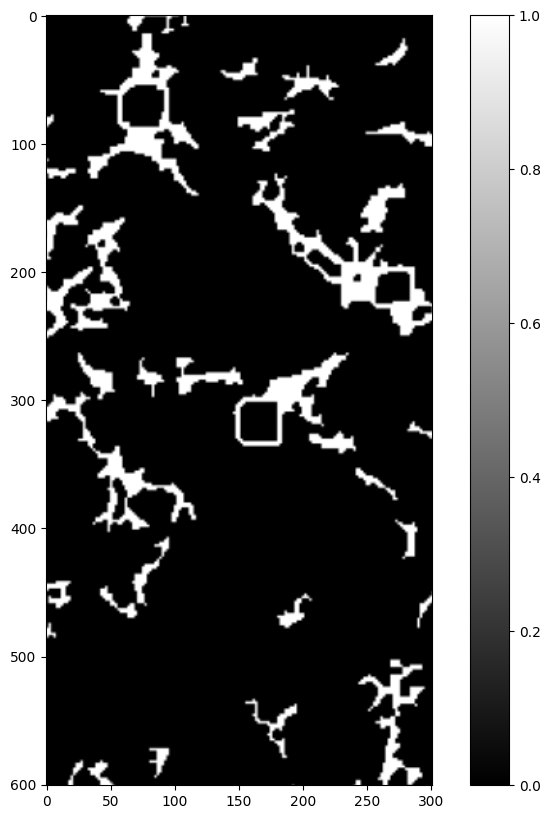

In [12]:
plt.figure(figsize=(10, 10))
plt.imshow(data_s2[0].data[0], cmap='gray')
plt.colorbar()
plt.show()

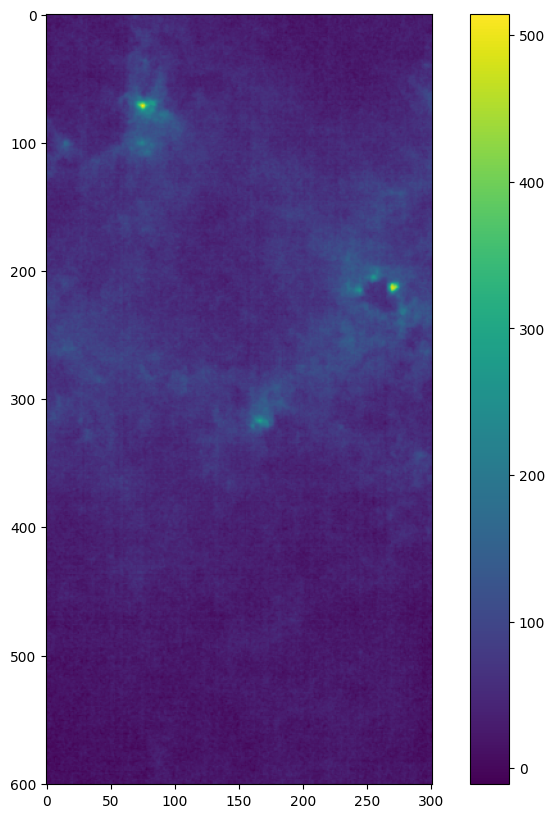

In [13]:
plt.figure(figsize=(10, 10))
plt.imshow(data_cohrs_integ[0].data)
plt.colorbar()
plt.show()

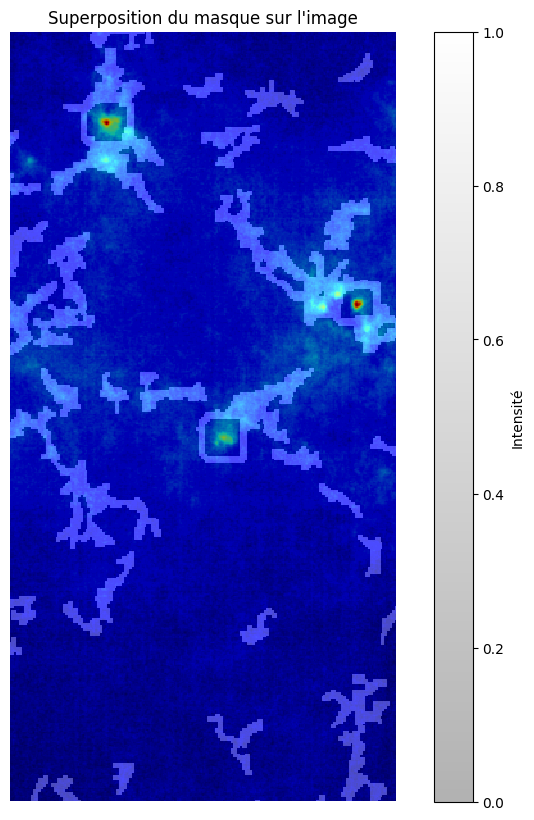

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# Assurez-vous que `data_s2` et `data_cohrs_integ` sont bien définis
# `color_image2` est obtenu depuis `data_cohrs_integ`
color_image2 = data_cohrs_integ[0].data

# Dimensions de l'image
height, width = data_s2[0].data[0].shape

# Création du masque coloré
mask = data_s2[0].data[0].astype(bool)  # Assurez-vous que le masque est binaire

# Création de l'image en couleurs
plt.figure(figsize=(10, 10))
plt.imshow(color_image2, cmap='jet', interpolation='nearest')  # Image de fond en niveaux de gris
plt.imshow(mask, cmap='gray', alpha=0.3, interpolation='nearest')  # Masque en couleur avec transparence

# Ajustement de l'affichage
plt.colorbar(label="Intensité")  # Barre colorée pour l'intensité du masque
plt.title("Superposition du masque sur l'image")
plt.axis('off')  # Masquer les axes
plt.show()

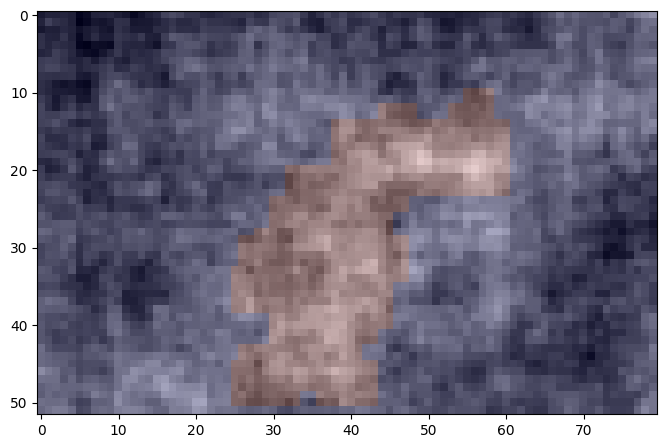

In [65]:
import matplotlib.pyplot as plt
import numpy as np

color_image2 = data_cohrs_integ[0].data
mask = data_s2[0].data[0].astype(bool)  

y_min, y_max = 120, 172 
x_min, x_max = 220, 300  

cropped_color_image2 = color_image2[y_min:y_max, x_min:x_max]
cropped_mask = mask[y_min:y_max, x_min:x_max]

plt.figure(figsize=(8, 8))
plt.imshow(cropped_color_image2, cmap='gray')  
plt.imshow(cropped_mask, cmap='jet', alpha=0.2)  
plt.show()

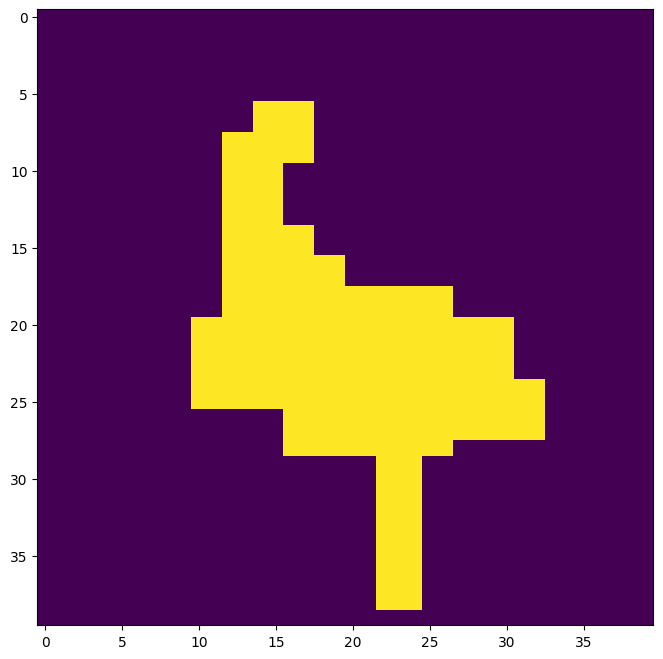

In [60]:
plt.figure(figsize=(8, 8))
plt.imshow(cropped_mask)  
plt.show()

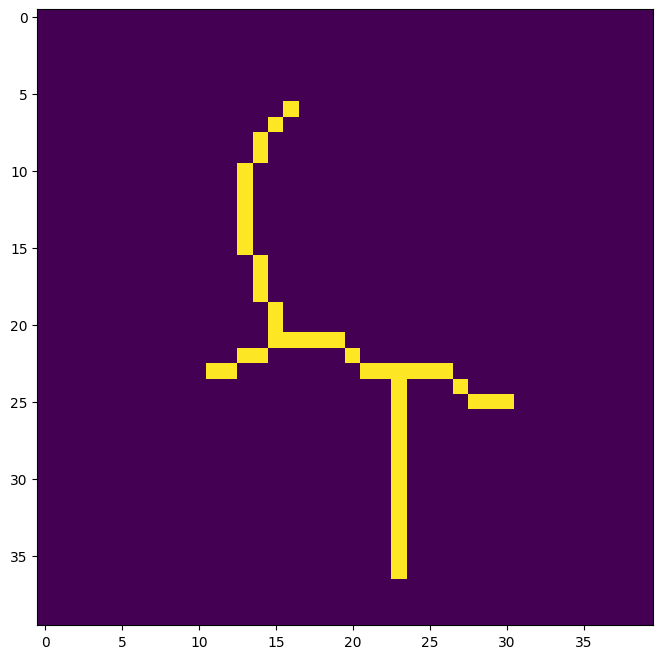

In [61]:
import skimage.morphology as morph
skeleton = morph.skeletonize(cropped_mask)
plt.figure(figsize=(8, 8))
plt.imshow(skeleton)  
plt.show()

# On LV

In [ ]:
data_s2.shape

# TO do

- division en 10km/s
reprendre ancien travail

combien de morceaux

initialiser clustering 

In [ ]:
sub_data_s2 = data_s2.sum(axis=1)[300:400, x_min:x_max]

In [ ]:
plt.figure(figsize=(8, 8))
plt.imshow(sub_data_s2)  
plt.show()

In [ ]:
sub_data_s2.shape

In [ ]:
sub_data_s2 = sub_data_s2>0

In [ ]:
sub_data_s2.max()

In [ ]:
data_cohrs_lv[0].data.shape 

In [ ]:
sub_data_cohrs_lv = data_cohrs_lv[0].data[300:400, y_min:y_max]

In [ ]:
sub_data_cohrs_lv.shape

In [ ]:
skeleton.shape

In [ ]:
plt.figure(figsize=(50, 20))
plt.imshow(sub_data_cohrs_lv, cmap='gray')
plt.imshow(sub_data_s2, cmap="jet", alpha=0.1)
plt.show()